# Outlier Detection & Removal

**How to treat outliers?**

- **Trimming**. Completly remove the outliers from the dataset.
- **Capping**. Set a upper limit and lower limit. And all makes all the outliers within the limits.
- **Treat as missing values**
- **Discretization**

**How to detect Outliers?**

- **Closed to Normal Distribution data**

![Normal Distribution](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png)

- **Skewed Distribution Data**

![Skewed Distribution](https://i.ytimg.com/vi/BE8CVGJuftI/maxresdefault.jpg)

- **Other Distributions**

![Other Distributions](https://acutecaretesting.org/-/media/acutecaretesting/articles/fig-2-example.jpg)

## Z-Score Method

**This method is best for normally distributed data.** 

![Normal Distribution](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png)

$$\text{Z transform}(X'_i) = \frac{X_i - \mu}{\sigma} \text{ where } \mu \text{ is mean and } \sigma \text{ is standard deviation}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None 

In [2]:
df = pd.read_csv("../Datasets/placement.csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
583,7.10,68.0,0
258,6.12,6.0,1
506,7.84,8.0,1
261,7.17,11.0,1
800,6.50,28.0,0


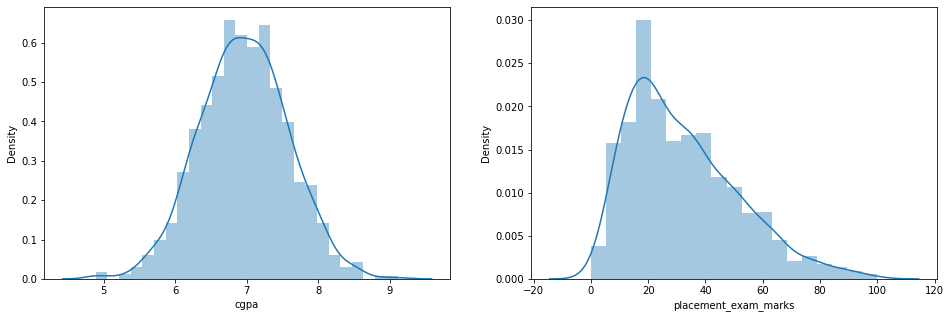

In [3]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.distplot(df["cgpa"])

plt.subplot(1, 2, 2)
sns.distplot(df["placement_exam_marks"])
plt.show()

In [5]:
print(f"Mean value of cgpa {df['cgpa'].mean()}")
print(f"Std value of cgpa {df['cgpa'].std()}")
print(f"Min value of cgps {df['cgpa'].min()}")
print(f"Max value of cgpa {df['cgpa'].max()}")

Mean value of cgpa 6.96124000000001
Std value of cgpa 0.6158978751323894
Min value of cgps 4.89
Max value of cgpa 9.12


In [8]:
# finding the boundary values
max_allowed = df['cgpa'].mean() + 3 * df['cgpa'].std()
min_allowed = df['cgpa'].mean() - 3 * df['cgpa'].std()
print(f"Highest allowed {max_allowed}")
print(f"Lowest allowed {min_allowed}")

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [12]:
# finding the outliers
df[(df["cgpa"] > max_allowed) | (df["cgpa"] < min_allowed)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming

#### Approach 1

In [14]:
new_df = df[(df["cgpa"] < max_allowed) & (df["cgpa"] > min_allowed)]
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


#### Approach 2

In [15]:
# calculating z-score
df["cgpa_zscore"] = (df["cgpa"] - df["cgpa"].mean())/df["cgpa"].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [16]:
df[df["cgpa_zscore"] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [17]:
df[df["cgpa_zscore"] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [18]:
df[(df["cgpa_zscore"] > 3) | (df["cgpa_zscore"] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [19]:
# trimming
new_df = df[(df["cgpa_zscore"] < 3) & (df["cgpa_zscore"] > -3)]

### Capping

In [20]:
df["cgpa"] = np.where(
    df["cgpa"] > max_allowed,
    max_allowed,
    np.where(
        df["cgpa"] < min_allowed,
        min_allowed,
        df["cgpa"]
    )
)

df.shape

(1000, 4)

In [21]:
df["cgpa"].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

## IQR Method

![Skewed Distribution](https://i.ytimg.com/vi/BE8CVGJuftI/maxresdefault.jpg)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("../Datasets/placement.csv")
df.shape

(1000, 3)

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
854,5.83,68.0,1
168,6.51,37.0,1
338,7.45,46.0,1
120,6.99,46.0,1
812,5.99,23.0,0


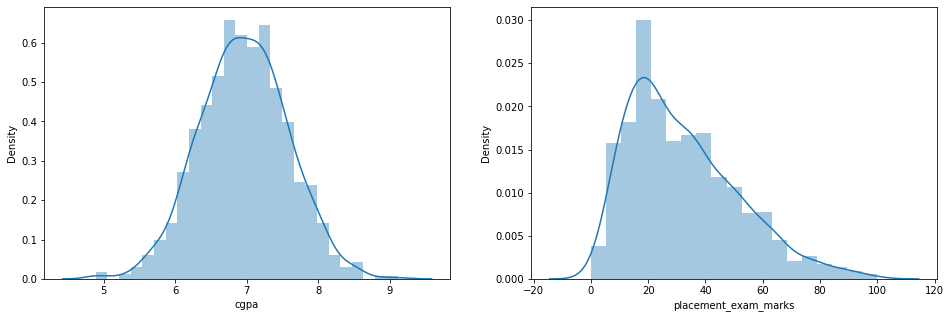

In [6]:
plt.figure(figsize = (16, 5))
plt.subplot(1, 2, 1)
sns.distplot(df["cgpa"])

plt.subplot(122)
sns.distplot(df["placement_exam_marks"])

plt.show()

In [7]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

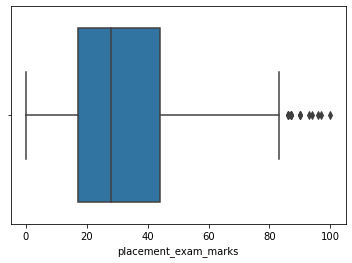

In [8]:
sns.boxplot(df["placement_exam_marks"])
plt.show()

In [9]:
# finding the IQR
percentile25 = df["placement_exam_marks"].quantile(0.25)
percentile75 = df["placement_exam_marks"].quantile(0.75)

iqr = percentile75 - percentile25
iqr

27.0

In [10]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(f"Upper limit: {upper_limit}")
print(f"Lower limit: {lower_limit}")

Upper limit: 84.5
Lower limit: -23.5


In [11]:
# finding outliers
df[(df["placement_exam_marks"] > upper_limit) | (df["placement_exam_marks"] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### Trimming

In [13]:
# trimming
new_df = df[(df["placement_exam_marks"] < upper_limit) & (df["placement_exam_marks"] > lower_limit)]
new_df.shape

(985, 3)

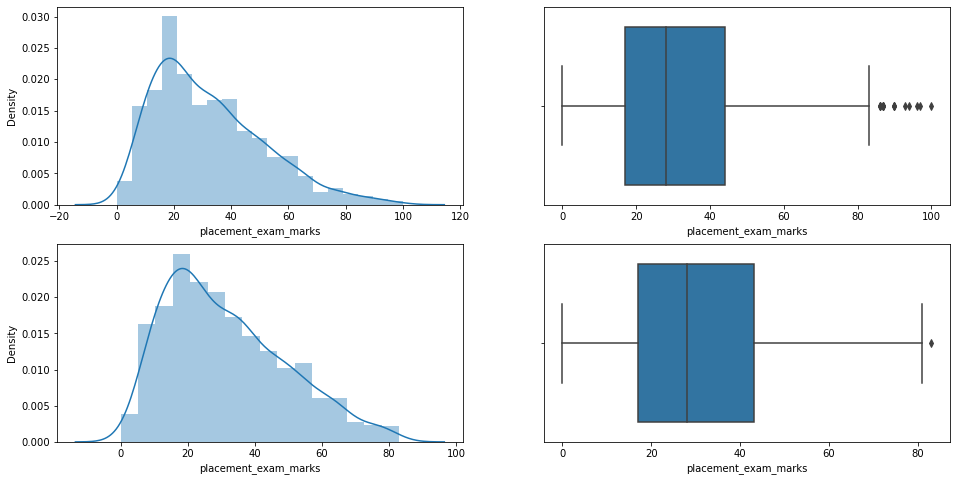

In [14]:
# comparing
plt.figure(figsize = (16, 8))
plt.subplot(221)
sns.distplot(df["placement_exam_marks"])

plt.subplot(222)
sns.boxplot(df["placement_exam_marks"])

plt.subplot(223)
sns.distplot(new_df["placement_exam_marks"])

plt.subplot(224)
sns.boxplot(new_df["placement_exam_marks"])

plt.show()

### Capping

In [15]:
# capping
new_df = df.copy()

new_df["placement_exam_marks"] = np.where(
    new_df["placement_exam_marks"] > upper_limit,
    upper_limit,
    np.where(
        new_df["placement_exam_marks"] < lower_limit,
        lower_limit,
        new_df["placement_exam_marks"]
    )
)

new_df.shape

(1000, 3)

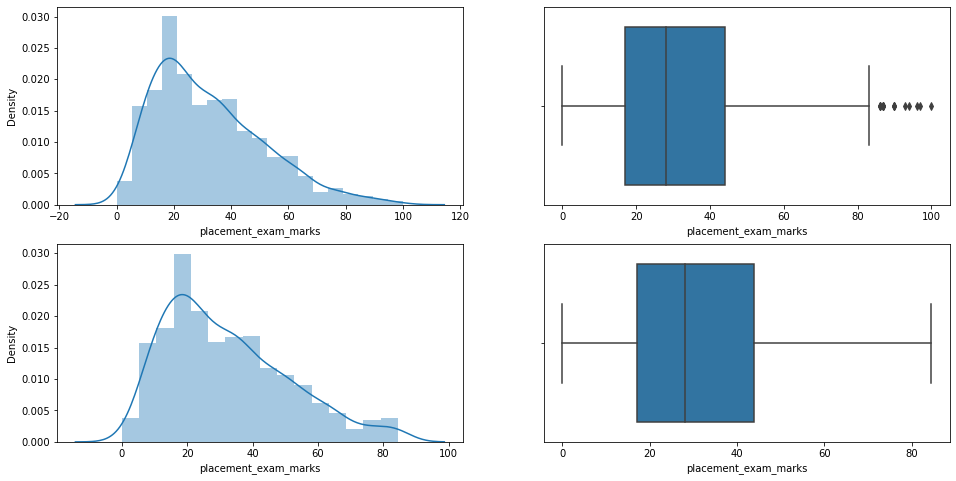

In [16]:
# comparing
plt.figure(figsize = (16, 8))
plt.subplot(221)
sns.distplot(df["placement_exam_marks"])

plt.subplot(222)
sns.boxplot(df["placement_exam_marks"])

plt.subplot(223)
sns.distplot(new_df["placement_exam_marks"])

plt.subplot(224)
sns.boxplot(new_df["placement_exam_marks"])

plt.show()

## Winsorization Technique

![Other Distributions](https://acutecaretesting.org/-/media/acutecaretesting/articles/fig-2-example.jpg)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("../Datasets/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

In [4]:
df["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

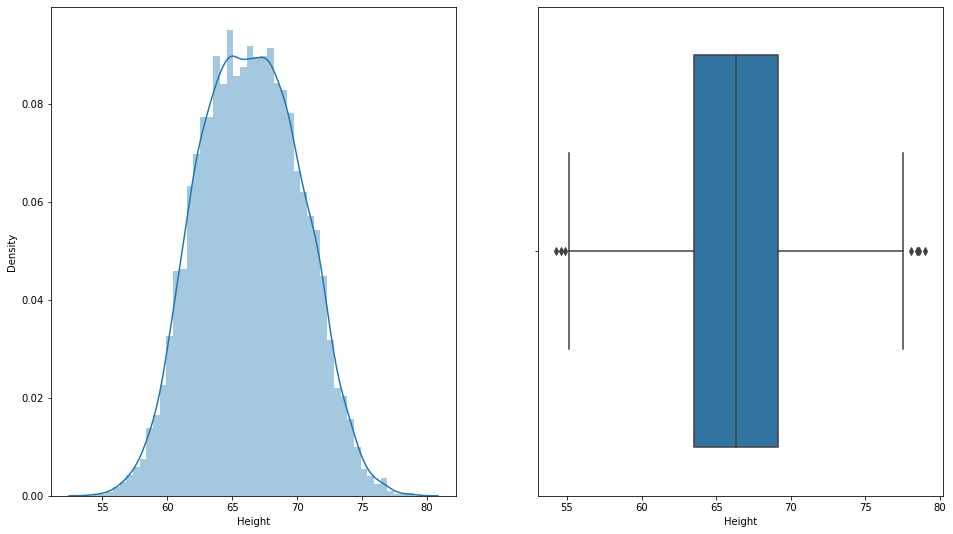

In [12]:
plt.figure(figsize = (16, 9))
plt.subplot(121)
sns.distplot(df["Height"])

plt.subplot(122)
sns.boxplot(df["Height"])
plt.show()

### Trimming

In [13]:
upper_limit = df["Height"].quantile(0.99)
lower_limit = df["Height"].quantile(0.01)

print(f"Upper limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper limit: 74.7857900583366
Lower Limit: 58.13441158671655


In [17]:
new_df = df[(df["Height"] <= upper_limit) & (df["Height"] >= lower_limit)]
new_df.shape

(9800, 3)

In [22]:
pd.DataFrame([new_df["Height"].describe(), df["Height"].describe()])

,count,mean,std,min,25%,50%,75%,max
Height,9800.0,66.364366,3.645075,58.134496,63.577162,66.31807,69.119896,74.785714
Height,10000.0,66.367560,3.847528,54.263133,63.505620,66.31807,69.174262,78.998742


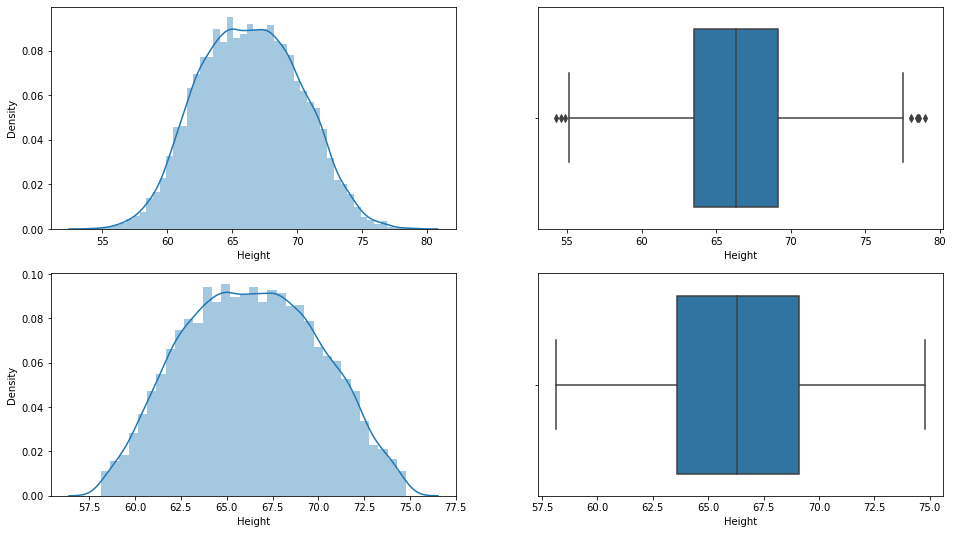

In [24]:
plt.figure(figsize = (16, 9))

plt.subplot(221)
sns.distplot(df["Height"])

plt.subplot(222)
sns.boxplot(df["Height"])

plt.subplot(223)
sns.distplot(new_df["Height"])

plt.subplot(224)
sns.boxplot(new_df["Height"])

plt.show()

### Capping

In [27]:
df["Height"] = np.where(
    df["Height"] >= upper_limit,
    upper_limit,
    np.where(
        df["Height"] <= lower_limit,
        lower_limit,
         df["Height"]
    )
)

df.shape

(10000, 3)

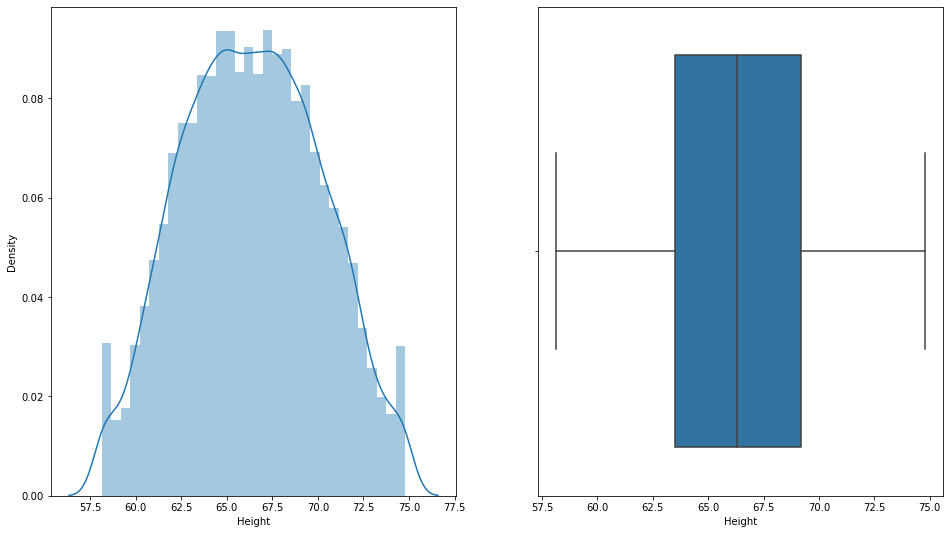

In [28]:
plt.figure(figsize = (16, 9))

plt.subplot(121)
sns.distplot(df["Height"])

plt.subplot(122)
sns.boxplot(df["Height"])

plt.show()